In [ ]:
### Packages and data 
import upsetplot as ups
from pathlib import Path
import pandas as pd
import copy
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42

### EE data
#DNAse and ATAC overlap values were obtained from the EE_summary files 

## DM
dic_dm={"DNAse ChipAtlas":[],"ATAC ChipAtlas":[]}
with open("/home/mouren/Data/final_files_tokeep/other_species/robust_catalog_dm6.tsv") as file:
    for line in file:           

        if line.strip().split()[20] != "NA":
            dic_dm["DNAse ChipAtlas"].append(True)
        else:
            dic_dm["DNAse ChipAtlas"].append(False)

        if line.strip().split()[24] != "NA":
            dic_dm["ATAC ChipAtlas"].append(True)
        else:
            dic_dm["ATAC ChipAtlas"].append(False)
df_dm = pd.DataFrame(dic_dm)

## TAIR
dic_t={"DNAse PlantRegMap":[],"ATAC GEO":[]}
with open("/home/mouren/Data/final_files_tokeep/other_species/robust_catalog_tair10.tsv") as file:
    for line in file:           

        if line.strip().split()[20] != "NA":
            dic_t["DNAse PlantRegMap"].append(True)
        else:
            dic_t["DNAse PlantRegMap"].append(False)

        if line.strip().split()[24] != "NA":
            dic_t["ATAC GEO"].append(True)
        else:
            dic_t["ATAC GEO"].append(False)
df_t = pd.DataFrame(dic_t)

## HG
dic={"DNAse ENCODE":[],"DNAse ChipAtlas":[],"ATAC ChipAtlas":[]}
with open("/home/mouren/Data/final_files_tokeep/final_catalogs/robust_catalog_hsap.tsv") as file:
    for line in file:           
        if line.strip().split()[20] != "NA":
            dic["DNAse ENCODE"].append(True)
        else:
            dic["DNAse ENCODE"].append(False)

        if line.strip().split()[23] != "NA":
            dic["DNAse ChipAtlas"].append(True)
        else:
            dic["DNAse ChipAtlas"].append(False)

        if line.strip().split()[27] != "NA":
            dic["ATAC ChipAtlas"].append(True)
        else:
            dic["ATAC ChipAtlas"].append(False)

df = pd.DataFrame(dic)

## MM
dic_mm={"DNAse ENCODE":[],"DNAse ChipAtlas":[],"ATAC ChipAtlas":[]}
with open("/home/mouren/Data/final_files_tokeep/other_species/robust_catalog_mm39.tsv") as file:
    for line in file:           
        if line.strip().split()[20] != "NA":
            dic_mm["DNAse ENCODE"].append(True)
        else:
            dic_mm["DNAse ENCODE"].append(False)

        if line.strip().split()[23] != "NA":
            dic_mm["DNAse ChipAtlas"].append(True)
        else:
            dic_mm["DNAse ChipAtlas"].append(False)

        if line.strip().split()[27] != "NA":
            dic_mm["ATAC ChipAtlas"].append(True)
        else:
            dic_mm["ATAC ChipAtlas"].append(False)

df_mm = pd.DataFrame(dic_mm)

custom_order = [ "ATAC ChipAtlas","DNAse ChipAtlas","DNAse ENCODE"]
df_mm = df_mm[custom_order]  # Reorder the columns

/home/mouren/miniconda3/lib/python3.9/site-packages/upsetplot/plotting.py:660: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/mouren/miniconda3/lib/python3.9/site-packages/upsetplot/plotting.py:661: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

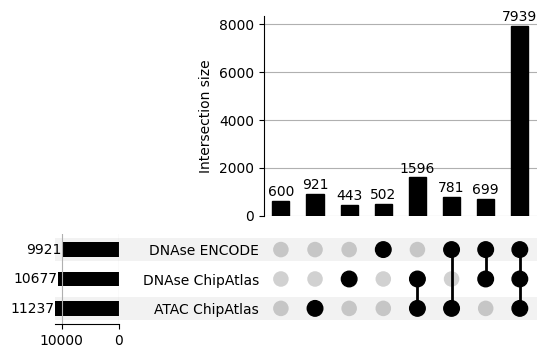

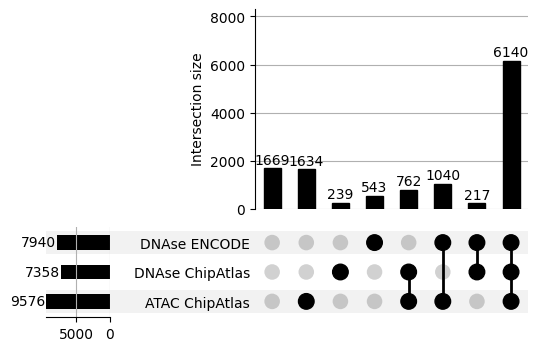

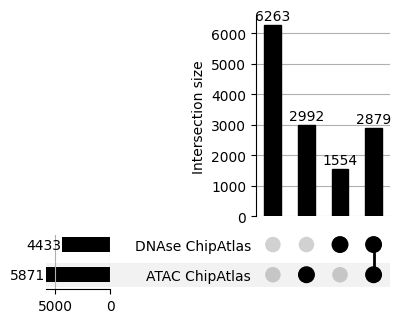

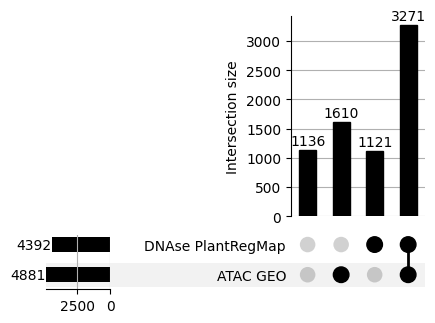

In [2]:
ups.UpSet(ups.from_indicators(lambda el: el.select_dtypes(bool),data=df),show_counts=True).plot()
plt.savefig("/home/mouren/Images/tls1/supplementary_figures/supp_fig2/dnase_atac_upset/dnase_atac_upset_hg.pdf", format="pdf", bbox_inches="tight", dpi=450)
plt.savefig("/home/mouren/Images/tls1/supplementary_figures/supp_fig2/dnase_atac_upset/dnase_atac_upset_hg.png", format="png", bbox_inches="tight", dpi=450)

upset_data = ups.from_indicators(lambda el: el.select_dtypes(bool), data=df_mm)
upset_data = upset_data.reorder_levels(custom_order)  # Force the row order
ups.UpSet(upset_data,show_counts=True,sort_categories_by=None).plot()
plt.gca().set_ylim(0, 8300)
plt.savefig("/home/mouren/Images/tls1/supplementary_figures/supp_fig2/dnase_atac_upset/dnase_atac_upset_mm.pdf", format="pdf", bbox_inches="tight", dpi=450)
plt.savefig("/home/mouren/Images/tls1/supplementary_figures/supp_fig2/dnase_atac_upset/dnase_atac_upset_mm.png", format="png", bbox_inches="tight", dpi=450)

ups.UpSet(ups.from_indicators(lambda el: el.select_dtypes(bool),data=df_dm),show_counts=True).plot()
plt.savefig("/home/mouren/Images/tls1/supplementary_figures/supp_fig2/dnase_atac_upset/dnase_atac_upset_dm.pdf", format="pdf", bbox_inches="tight", dpi=450)
plt.savefig("/home/mouren/Images/tls1/supplementary_figures/supp_fig2/dnase_atac_upset/dnase_atac_upset_dm.png", format="png", bbox_inches="tight", dpi=450)
ups.UpSet(ups.from_indicators(lambda el: el.select_dtypes(bool),data=df_t),show_counts=True).plot()
plt.savefig("/home/mouren/Images/tls1/supplementary_figures/supp_fig2/dnase_atac_upset/dnase_atac_upset_tair.pdf", format="pdf", bbox_inches="tight", dpi=450)
plt.savefig("/home/mouren/Images/tls1/supplementary_figures/supp_fig2/dnase_atac_upset/dnase_atac_upset_tair.png", format="png", bbox_inches="tight", dpi=450)